<a href="https://colab.research.google.com/github/yongchenyen/Python/blob/main/%E9%97%9C%E8%81%AF%E5%88%86%E6%9E%90_%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90_%E7%90%83%E9%9E%8B%E5%93%81%E7%89%8C%E8%B3%87%E6%96%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 關聯分析_資料分析_球鞋品牌資料

引入套件

In [ ]:
import pandas as pd
import numpy as np

用表單陣列方式將資料引入

簡單來說 [第一個交易資料，每一個''為一個商品，','唯一個商品分隔]

(處理交易資料格式)

In [ ]:
mylist = [
    ['adidas', 'Fila', 'Under Armour'],
    ['Nike', 'Lacoste', 'New Balance', 'Pony'],
    ['adidas', 'Pony', 'Under Armour'],
    ['adidas', 'New Balance', 'Fila'],
    ['Lacoste', 'Pony'],
    ['adidas', 'New Balance', 'Pony'],
    ['Nike', 'New Balance', 'Fila'],
    ['Nike', 'Lacoste', 'Fila'],
    ['adidas', 'Lacoste', 'Fila'],
    ['Nike', 'Lacoste', 'Fila']
    ]
mylist

[['adidas', 'Fila', 'Under Armour'],
 ['Nike', 'Lacoste', 'New Balance', 'Pony'],
 ['adidas', 'Pony', 'Under Armour'],
 ['adidas', 'New Balance', 'Fila'],
 ['Lacoste', 'Pony'],
 ['adidas', 'New Balance', 'Pony'],
 ['Nike', 'New Balance', 'Fila'],
 ['Nike', 'Lacoste', 'Fila'],
 ['adidas', 'Lacoste', 'Fila'],
 ['Nike', 'Lacoste', 'Fila']]

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(mylist).transform(mylist)
te_ary

array([[ True, False, False, False, False,  True,  True],
       [False,  True,  True,  True,  True, False, False],
       [False, False, False, False,  True,  True,  True],
       [ True, False,  True, False, False, False,  True],
       [False,  True, False, False,  True, False, False],
       [False, False,  True, False,  True, False,  True],
       [ True, False,  True,  True, False, False, False],
       [ True,  True, False,  True, False, False, False],
       [ True,  True, False, False, False, False,  True],
       [ True,  True, False,  True, False, False, False]])

運用type去檢查資料型態是否為list

len用於檢查長度 length

In [ ]:
print(type(mylist))
print(len(mylist))

<class 'list'>
10


In [ ]:
print(mylist[0])
print(mylist[1])
print(mylist[4])
print(mylist[4][0])
print(mylist[4][1])
print(mylist[-1])
print(mylist[-1][-1])
print(mylist[1][0])
print(mylist[1][0:3])
print(mylist[1][:3])
print(mylist[1][2:])

['adidas', 'Fila', 'Under Armour']
['Nike', 'Lacoste', 'New Balance', 'Pony']
['Lacoste', 'Pony']
Lacoste
Pony
['Nike', 'Lacoste', 'Fila']
Fila
Nike
['Nike', 'Lacoste', 'New Balance']
['Nike', 'Lacoste', 'New Balance']
['New Balance', 'Pony']


資料轉換，使用關聯規則mlxtend模組，mlxtend預處理模組提供了各種數據標準化和歸一化方法 將資料進行預處理作業 mlxtend 官方資料 由於Apriori要進行資料比對關聯計算 我們運用transactionEncoder函數幫忙進行資料轉換 fit()訓練資料，找出檢查清單中，唯一值的資料 transform()函數則是將每一筆資料進行判斷紀錄是或否

A. mlxtend.preprocessing是一個機器學習工具包（ML toolkit），其中包含了一些用於資料預處理和特徵工程的函數和類。

TransactionEncoder是mlxtend.preprocessing中的一個類，它用於將資料集轉換為事件清單，以便用於頻繁模式挖掘演算法。具體來說，它將資料集轉換為一個布林類型的矩陣，其中每行表示一個事務，每列表示一個項集，如果事務中包含某個項集，則相應的矩陣元素為1，否則為0。

fit(transactions): 用於擬合TransactionEncoder對象，其中transactions是一個列表的列表，表示原始的交易資料集； transform(transactions): 將交易資料集轉換為布林類型的矩陣；



In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(mylist).transform(mylist)
te_ary

array([[ True, False, False, False, False,  True,  True],
       [False,  True,  True,  True,  True, False, False],
       [False, False, False, False,  True,  True,  True],
       [ True, False,  True, False, False, False,  True],
       [False,  True, False, False,  True, False, False],
       [False, False,  True, False,  True, False,  True],
       [ True, False,  True,  True, False, False, False],
       [ True,  True, False,  True, False, False, False],
       [ True,  True, False, False, False, False,  True],
       [ True,  True, False,  True, False, False, False]])

te_ary是一個NumPy陣列，通常是使用TransactionEncoder類將交易資料集轉換為布林類型矩陣後得到的結果。astype是NumPy陣列的一個方法，用於將陣列的資料類型轉換為指定的資料類型。

因此我們將資料類型轉換為int 變成0與1

讓陣列結果容易提供電腦進行計算

In [ ]:
te_ary.astype('int')

array([[1, 0, 0, 0, 0, 1, 1],
       [0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 1],
       [1, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 0, 0]])

發現順序看不太懂，先把紀錄使用的欄位columns_印出來

In [ ]:
te.columns_

['Fila', 'Lacoste', 'New Balance', 'Nike', 'Pony', 'Under Armour', 'adidas']

將欄位資料與母體資料進行合併，使用df表單存取

In [ ]:
df = pd.DataFrame(te_ary, columns = te.columns_)
df

,Fila,Lacoste,New Balance,Nike,Pony,Under Armour,adidas
0,True,False,False,False,False,True,True
1,False,True,True,True,True,False,False
2,False,False,False,False,True,True,True
3,True,False,True,False,False,False,True
4,False,True,False,False,True,False,False
5,False,False,True,False,True,False,True
6,True,False,True,True,False,False,False
7,True,True,False,True,False,False,False
8,True,True,False,False,False,False,True
9,True,True,False,True,False,False,False


產生頻率比度項目集合

Apriori判斷關聯規則前，我們需要有最小支持度 min support以及頻繁項目集 frequenct itemset進行計算

最小支持度 t01 1,3,4 t02 2,3,5 t03 1,2,3,5 t04 2,5 t05 1,3,5

如果要把最小支持度發生次數最少的項目去除

手動會先把產品列出來 產品 次數 1 3 2 3 3 4 4 1 5 4

扣除4只發生一次。

支持度(min support)：「規則」在資料內具有普遍性，也就是這些 A 跟 B 同時出現的機率多少。

最小支持度的選擇通常是一個經驗性的過程。選擇一個比較常用的預設值作為最小支持度。例如，對於一些中等大小的資料集，0.3可以被視為一個相對較高，用於過濾掉一些不太頻繁的項集。然而，具體最小支持度的選擇還需要基於具體的應用場景和領域知識來確定。

In [ ]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support = 0.1)

,support,itemsets
0,0.6,(0)
1,0.5,(1)
2,0.4,(2)
3,0.4,(3)
4,0.4,(4)
5,0.2,(5)
6,0.5,(6)
7,0.3,"(0, 1)"
8,0.2,"(0, 2)"
9,0.3,"(0, 3)"


把產品名稱的欄位放回去表格中

In [ ]:
frequent_itemsets = apriori(df, min_support = 0.3, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.6,(Fila)
1,0.5,(Lacoste)
2,0.4,(New Balance)
3,0.4,(Nike)
4,0.4,(Pony)
5,0.5,(adidas)
6,0.3,"(Lacoste, Fila)"
7,0.3,"(Fila, Nike)"
8,0.3,"(Fila, adidas)"
9,0.3,"(Lacoste, Nike)"


由於我們最後是讓電腦去跑關聯數據 因此要將文字的次數轉換為數據長度

簡單而言如果商品發生兩種，他因為陣列計算時，依照itemasets欄位去偵測，發現len長度為2，則會印出數量為2

In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Fila),1
1,0.5,(Lacoste),1
2,0.4,(New Balance),1
3,0.4,(Nike),1
4,0.4,(Pony),1
5,0.5,(adidas),1
6,0.3,"(Lacoste, Fila)",2
7,0.3,"(Fila, Nike)",2
8,0.3,"(Fila, adidas)",2
9,0.3,"(Lacoste, Nike)",2


引入判斷式，當商品數量為2且信賴度為0.3以上的商品有哪些

In [ ]:
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.3)]

,support,itemsets,length
6,0.3,"(Lacoste, Fila)",2
7,0.3,"(Fila, Nike)",2
8,0.3,"(Fila, adidas)",2
9,0.3,"(Lacoste, Nike)",2


如果不去管信賴度資料，直接找itemsets資料有nike與lacoste的產品

In [ ]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'Nike', 'Lacoste'}]

,support,itemsets,length
9,0.3,"(Lacoste, Nike)",2


設定我們要找的產品，進行搜尋

In [ ]:
fname = 'Nike'
frequent_itemsets[frequent_itemsets['itemsets'].astype(str).str.title().str.contains(fname)]

,support,itemsets,length
3,0.4,(Nike),1
7,0.3,"(Fila, Nike)",2
9,0.3,"(Lacoste, Nike)",2


##進入產生關聯規則方式
信賴度（Confidence）：某一個種類 (A) 中，含有另一個種類 (B) 的比重，也就是在 A 出現的情況下，B 出現的機率值，假設我有5筆交易紀錄，其中 3 筆買過尿布，而這 3 筆買過尿布的當中，又另有 3 人買過啤酒，則confidence (尿布->啤酒) = 3/3 = 100% 。

這邊我們建立一個規則

前面我們用到的是找出產品之間購買的項次關係

這邊要加入一個最小信心度，如果商品賣出時，跟其他商品關聯被買的機率。

support
當我買了nike+fila的總次數對於所有紀錄的交易紀錄的總次數比例 3/10 =30%

confidence
當我買了nike+fila的總次數比例佔於nike的次數比例 3/4 =75%

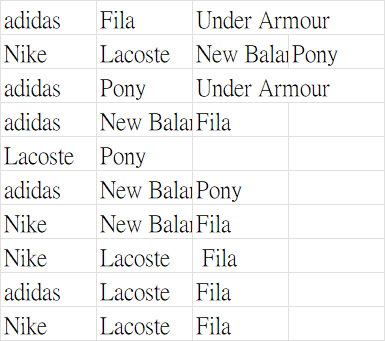

加入一個僅在購買特定商品時，發生的信心次數機率

In [ ]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric = 'confidence', min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Lacoste),(Fila),0.5,0.6,0.3,0.60,1.00,0.00,1.0,0.000000
1,(Fila),(Lacoste),0.6,0.5,0.3,0.50,1.00,0.00,1.0,0.000000
2,(Fila),(Nike),0.6,0.4,0.3,0.50,1.25,0.06,1.2,0.500000
3,(Nike),(Fila),0.4,0.6,0.3,0.75,1.25,0.06,1.6,0.333333
4,(Fila),(adidas),0.6,0.5,0.3,0.50,1.00,0.00,1.0,0.000000
5,(adidas),(Fila),0.5,0.6,0.3,0.60,1.00,0.00,1.0,0.000000
6,(Lacoste),(Nike),0.5,0.4,0.3,0.60,1.50,0.10,1.5,0.666667
7,(Nike),(Lacoste),0.4,0.5,0.3,0.75,1.50,0.10,2.0,0.555556


lift提升度：某一個以規則組合出現及單獨出現的比值，公式為confidence(A->B) / support(B)

提升度>1或越高表示兩個商品越相關，提升度=1表示為互相獨立、提升度<1或越低代表負相關性越高。

(Fila->Nike) = 0.5/0.3 = 1.25 。

建立一個基準規則，讓我們未來都依據該規則去計算

In [ ]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Lacoste),(Fila),0.5,0.6,0.3,0.60,1.00,0.00,1.0,0.000000
1,(Fila),(Lacoste),0.6,0.5,0.3,0.50,1.00,0.00,1.0,0.000000
2,(Fila),(Nike),0.6,0.4,0.3,0.50,1.25,0.06,1.2,0.500000
3,(Nike),(Fila),0.4,0.6,0.3,0.75,1.25,0.06,1.6,0.333333
4,(Fila),(adidas),0.6,0.5,0.3,0.50,1.00,0.00,1.0,0.000000
5,(adidas),(Fila),0.5,0.6,0.3,0.60,1.00,0.00,1.0,0.000000
6,(Lacoste),(Nike),0.5,0.4,0.3,0.60,1.50,0.10,1.5,0.666667
7,(Nike),(Lacoste),0.4,0.5,0.3,0.75,1.50,0.10,2.0,0.555556


把前面所談過的篩選規則放入，加入rules, 不過這邊的規則不太影響分析結果

計算關聯規則中與前項的大小，然後將這個大小存儲在一個新的列中。

lambda x:len(x)，這個函數的作用是計算輸入項集的大小。apply方法會對DataFrame中的每個前項項集都應用這個函數，並將計算結果存儲在新的一列中。這樣做的目的可能是為了進一步分析規則中前項項集大小與其他指標之間的關係，或者根據前項項集大小對規則進行分類或篩選。

當前項項集大小大於1的規則往往具有更加明顯的關聯性，同時也更加稀有，這些規則往往更能夠為我們提供有用的資訊，説明我們發現資料中的隱藏規律。 因此，通過限制前項項集大小大於1，我們可以得到更加精准的關聯規則，同時避免一些無意義或不太重要的規則的干擾，從而更好地發現資料中的關聯關係和規律。

In [ ]:
rules['antecedent_len'] = rules['antecedents'].apply(lambda x:len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
0,(Lacoste),(Fila),0.5,0.6,0.3,0.60,1.00,0.00,1.0,0.000000,1
1,(Fila),(Lacoste),0.6,0.5,0.3,0.50,1.00,0.00,1.0,0.000000,1
2,(Fila),(Nike),0.6,0.4,0.3,0.50,1.25,0.06,1.2,0.500000,1
3,(Nike),(Fila),0.4,0.6,0.3,0.75,1.25,0.06,1.6,0.333333,1
4,(Fila),(adidas),0.6,0.5,0.3,0.50,1.00,0.00,1.0,0.000000,1
5,(adidas),(Fila),0.5,0.6,0.3,0.60,1.00,0.00,1.0,0.000000,1
6,(Lacoste),(Nike),0.5,0.4,0.3,0.60,1.50,0.10,1.5,0.666667,1
7,(Nike),(Lacoste),0.4,0.5,0.3,0.75,1.50,0.10,2.0,0.555556,1


引入判斷式，信心度>=0.6 和 提升度>1

In [ ]:
rules[(rules['confidence'] >= 0.6) & (rules['lift'] > 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
3,(Nike),(Fila),0.4,0.6,0.3,0.75,1.25,0.06,1.6,0.333333,1
6,(Lacoste),(Nike),0.5,0.4,0.3,0.60,1.50,0.10,1.5,0.666667,1
7,(Nike),(Lacoste),0.4,0.5,0.3,0.75,1.50,0.10,2.0,0.555556,1


加入判斷，資料長度為1

In [ ]:
rules[(rules['antecedent_len'] >= 1) & (rules['confidence'] >= 0.6) & (rules['lift'] > 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
3,(Nike),(Fila),0.4,0.6,0.3,0.75,1.25,0.06,1.6,0.333333,1
6,(Lacoste),(Nike),0.5,0.4,0.3,0.60,1.50,0.10,1.5,0.666667,1
7,(Nike),(Lacoste),0.4,0.5,0.3,0.75,1.50,0.10,2.0,0.555556,1


找出只有Nike的資料

In [ ]:
rules[rules['antecedents'] == {'Nike'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
3,(Nike),(Fila),0.4,0.6,0.3,0.75,1.25,0.06,1.6,0.333333,1
7,(Nike),(Lacoste),0.4,0.5,0.3,0.75,1.50,0.10,2.0,0.555556,1


# 關聯分析_資料分析_食物商品資料

關聯規則(Apriori)是做數據分析時超級常用的演算法，Python中的常用套件則是
apyori

安裝apyori套件

In [ ]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=2a0b327a8fc9b56c6e7c6f12a45c1bc7df7da5084972d97c5b1e01af4c4d9b47
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


加入數據，手動建立幾組數據進行測試

['汽水','餅乾','水果','三明治']

['餅乾','水果','報紙']

['汽水','餅乾','水果','報紙']

['餅乾']

A. 調整最小支持度(Min Support)、最小信心水準(Min Confidence)、最小提升度(Min Lift)來實現關聯分析，最小提升度要大於1才有關聯，所以要設在1以上，越大表示關聯性越強。

B. max_length: 用來調整要對幾個商品關聯, 如果改成max_length = 4，那print(pair)就會有二到四個商品在list中，它會繼續scan下去，直到項目集裡有四個商品

In [ ]:
## 引入套件
from apyori import apriori

## Data自行定義數據
market_data = [
    ['汽水', '餅乾', '水果', '三明治'],
    ['餅乾', '水果', '報紙'],
    ['汽水', '餅乾', '水果', '報紙'],
    ['餅乾'],
    ]

association_rules = apriori(market_data, min_support = 0.2, min_confidence = 0.2, min_lift = 2, max_length = 4)
association_results = list(association_rules)
#print(association_results)

for product in association_results:
  pair = product[0]
  products = [x for x in pair]
  print(products)
  print('Rule: ' + products[0] + ' →' + products[1])
  print('Support: ' + str(product[1]))
  print('Lift: ' + str(product[2][0]))
  print("==================================")

['三明治', '汽水']
Rule: 三明治 →汽水
Support: 0.25
Lift: OrderedStatistic(items_base=frozenset({'三明治'}), items_add=frozenset({'汽水'}), confidence=1.0, lift=2.0)
['三明治', '水果', '汽水']
Rule: 三明治 →水果
Support: 0.25
Lift: OrderedStatistic(items_base=frozenset({'三明治'}), items_add=frozenset({'水果', '汽水'}), confidence=1.0, lift=2.0)
['三明治', '餅乾', '汽水']
Rule: 三明治 →餅乾
Support: 0.25
Lift: OrderedStatistic(items_base=frozenset({'三明治'}), items_add=frozenset({'餅乾', '汽水'}), confidence=1.0, lift=2.0)
['三明治', '水果', '餅乾', '汽水']
Rule: 三明治 →水果
Support: 0.25
Lift: OrderedStatistic(items_base=frozenset({'三明治'}), items_add=frozenset({'水果', '餅乾', '汽水'}), confidence=1.0, lift=2.0)


找出商品的相關法則 (Association Rules)。python Mlxtend 這個 machine learning extensions，可以通過機器學習的方式，找出並建立關聯性。 :

In [ ]:
pip install mlxtend

antecedents：規則先導項

consequents：規則後繼項

antecedent support：規則先導項支持度

consequent support：規則後繼項支持度

support：規則支持度 （前項後項並集的支持度）

confidence：規則置信度 （規則置信度：規則支持度support / 規則先導項） lift：規則提升度，表示含有先導項條件下同時含有後繼項的概率，與後繼項總體發生的概率之比。

leverage：規則槓桿率，表示當先導項與後繼項獨立分佈時，先導項與後繼項一起出現的次數比預期多多少。

conviction：規則確信度，與提升度類似，但用差值表示。

In [ ]:
## import package
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## data自行定義數據
market_data = {
    'Transaction ID': [1, 2, 3, 4],
    'Items': [
        ['汽水', '餅乾', '水果', '三明治'],
        ['餅乾', '水果', '報紙'],
        ['汽水', '餅乾', '水果', '報紙'],
        ['餅乾'],
    ]
}

## 轉成dataframe
data = pd.DataFrame(market_data)

## 讓DataFrame 能呈現的寬度大一點
pd.options.display.max_colwidth = 100

## 轉成數值編碼，目前都是字串的組合
data_id = data.drop('Items', 1)
data_items = data.Items.str.join(',')

## 轉成數值
data_items = data_items.str.get_dummies(',')

## 接上Transaction ID
data = data_id.join(data_items)

## 計算支持度 Support
Support_items = apriori(data[['汽水','餅乾','水果','三明治','報紙']], min_support=0.2, use_colnames = True)

## 計算關聯規則 Association Rule
Association_Rules = association_rules(Support_items, metric='lift', min_threshold=1)
Association_Rules

<ipython-input-13-2d857653217a>:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_id = data.drop('Items', 1)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(餅乾),(汽水),1.00,0.50,0.50,0.500000,1.000000,0.0000,1.000,0.000000
1,(汽水),(餅乾),0.50,1.00,0.50,1.000000,1.000000,0.0000,inf,0.000000
2,(水果),(汽水),0.75,0.50,0.50,0.666667,1.333333,0.1250,1.500,1.000000
3,(汽水),(水果),0.50,0.75,0.50,1.000000,1.333333,0.1250,inf,0.500000
4,(三明治),(汽水),0.25,0.50,0.25,1.000000,2.000000,0.1250,inf,0.666667
...,...,...,...,...,...,...,...,...,...,...
83,"(餅乾, 汽水)","(水果, 報紙)",0.50,0.50,0.25,0.500000,1.000000,0.0000,1.000,0.000000
84,(水果),"(報紙, 餅乾, 汽水)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125,1.000000
85,(報紙),"(水果, 餅乾, 汽水)",0.50,0.50,0.25,0.500000,1.000000,0.0000,1.000,0.000000
86,(餅乾),"(水果, 報紙, 汽水)",1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000,0.000000


前50筆資料

In [ ]:
Association_Rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(餅乾),(汽水),1.00,0.50,0.50,0.500000,1.000000,0.0000,1.000,0.000000
1,(汽水),(餅乾),0.50,1.00,0.50,1.000000,1.000000,0.0000,inf,0.000000
2,(水果),(汽水),0.75,0.50,0.50,0.666667,1.333333,0.1250,1.500,1.000000
3,(汽水),(水果),0.50,0.75,0.50,1.000000,1.333333,0.1250,inf,0.500000
4,(三明治),(汽水),0.25,0.50,0.25,1.000000,2.000000,0.1250,inf,0.666667
5,(汽水),(三明治),0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500,1.000000
6,(報紙),(汽水),0.50,0.50,0.25,0.500000,1.000000,0.0000,1.000,0.000000
7,(汽水),(報紙),0.50,0.50,0.25,0.500000,1.000000,0.0000,1.000,0.000000
8,(水果),(餅乾),0.75,1.00,0.75,1.000000,1.000000,0.0000,inf,0.000000
9,(餅乾),(水果),1.00,0.75,0.75,0.750000,1.000000,0.0000,1.000,0.000000
